In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.3 MB/s eta 0:00:00


In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, roc_auc_score, average_precision_score,roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance

In [95]:
data = pd.read_csv("insurance_claims.csv")

In [96]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [97]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [98]:
data.drop('_c39',axis=1,inplace=True)

In [99]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [100]:
missing_values = missing_values_table(data)
missing_values

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [101]:

le = preprocessing.LabelEncoder()
le_count = 0

for col in data:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [102]:
colum_name =[]
unique_value=[]
for col in data:
    if data[col].dtype == 'object':
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7


In [103]:
data.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

In [104]:
data['insured_hobbies']=data['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

In [105]:
data['insured_hobbies'].unique()

array(['Other', 'chess', 'cross-fit'], dtype=object)

In [106]:
data = pd.get_dummies(data)
print('Training Features shape: ', data.shape)

Training Features shape:  (1000, 92)


In [107]:
#f, ax = plt.subplots(figsize=(20, 20))
corr= data.corr()
y=data['fraud_reported']
X= data.drop('fraud_reported',axis=1)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [109]:
level0 = list()
level0.append(('rf_clf', RandomForestClassifier()))
level0.append(('ext_clf', ExtraTreesClassifier()))
level0.append(('xgb_clf', xgboost.XGBClassifier()))
level0.append(('lgb_clf', LGBMClassifier()))
level0.append(('ada_clf', AdaBoostClassifier()))
level1 = CatBoostClassifier()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
model.fit(X_train, y_train)

Learning rate set to 0.008847
0:	learn: 0.6840573	total: 1.87ms	remaining: 1.87s
1:	learn: 0.6746252	total: 3.69ms	remaining: 1.84s
2:	learn: 0.6660250	total: 5.41ms	remaining: 1.8s
3:	learn: 0.6573210	total: 7.2ms	remaining: 1.79s
4:	learn: 0.6485557	total: 8.95ms	remaining: 1.78s
5:	learn: 0.6406504	total: 10.8ms	remaining: 1.78s
6:	learn: 0.6324934	total: 12.6ms	remaining: 1.78s
7:	learn: 0.6247788	total: 14.3ms	remaining: 1.77s
8:	learn: 0.6173212	total: 16ms	remaining: 1.76s
9:	learn: 0.6098876	total: 17.8ms	remaining: 1.76s
10:	learn: 0.6030106	total: 19.5ms	remaining: 1.75s
11:	learn: 0.5960903	total: 21.2ms	remaining: 1.74s
12:	learn: 0.5893298	total: 23ms	remaining: 1.75s
13:	learn: 0.5829280	total: 24.7ms	remaining: 1.74s
14:	learn: 0.5768471	total: 26.5ms	remaining: 1.74s
15:	learn: 0.5705544	total: 28.2ms	remaining: 1.73s
16:	learn: 0.5644707	total: 29.9ms	remaining: 1.73s
17:	learn: 0.5586335	total: 31.7ms	remaining: 1.73s
18:	learn: 0.5529866	total: 33.5ms	remaining: 1.73

StackingClassifier(cv=10,
                   estimators=[('rf_clf', RandomForestClassifier()),
                               ('ext_clf', ExtraTreesClassifier()),
                               ('xgb_clf',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('lgb_clf', LGBMClassifier()),
                               ('ada_clf', AdaBoostClassifier())],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7fd880f708e0>)

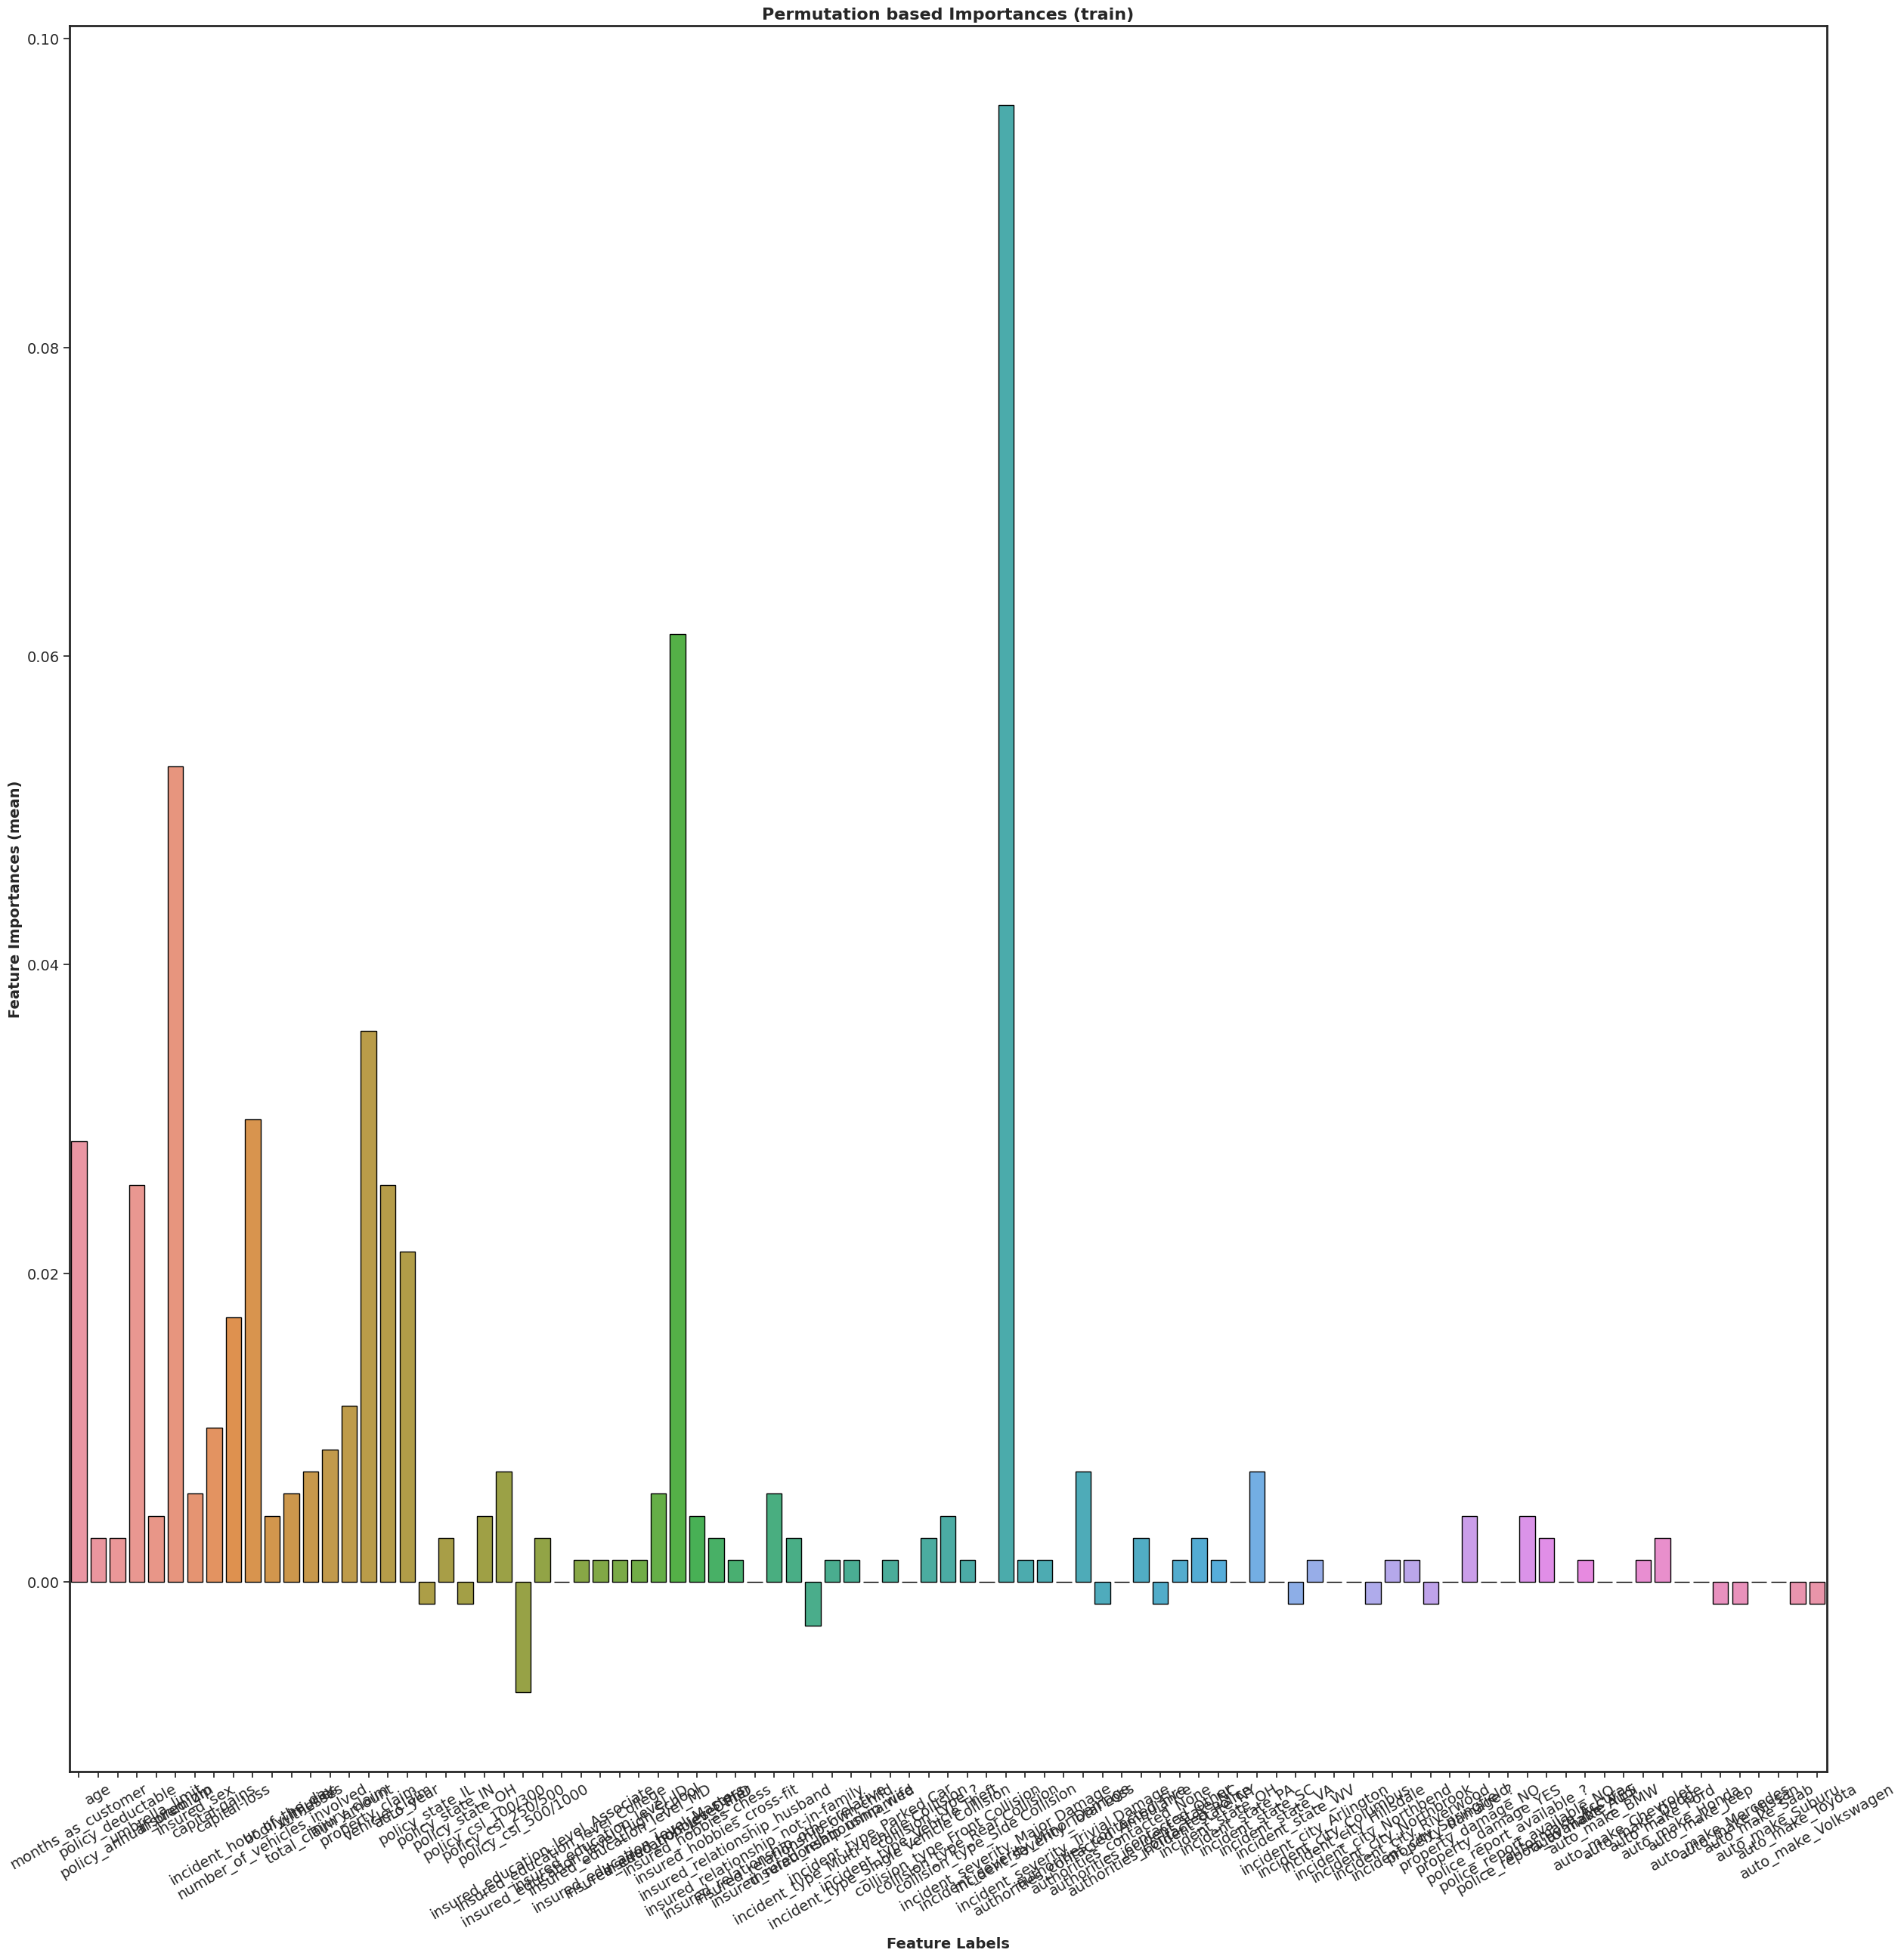

In [110]:
import matplotlib
sns.set_style('ticks')
matplotlib.rcParams['axes.linewidth'] = 2
result = permutation_importance(model, X_train, y_train, n_repeats=1,
                                random_state=0)
plt.figure(figsize=(30,30))
sns.barplot(x=X.columns, y=result.importances_mean, edgecolor = "black")
plt.title('Permutation based Importances (train)', fontsize=16, fontweight="bold")
plt.xlabel('Feature Labels', fontsize=14, fontweight="bold", fontname="Agency")
plt.ylabel('Feature Importances (mean)', fontsize=14, fontweight="bold", fontname="Agency")
plt.xticks(fontsize=14, rotation=30, fontname="Calbri")

plt.yticks(fontsize=14)
plt.show()

In [111]:
def eval_metrics(model, X_test, y_test):
    y_pred=model.predict(X_test)
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred, average='macro'))
    print("Precision : ", precision_score(y_test, y_pred, average='macro'))
    print("F-1 score : ", f1_score(y_test, y_pred, average='macro'))
    print("MCC : ", matthews_corrcoef(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    senstivity  = tp/(tp+fn)
    print("Specificity : ", specificity)
    print("Sensitivity : ", senstivity)

In [112]:
eval_metrics(model, X_test, y_test)

Accuracy :  0.8366666666666667
Recall :  0.7834068388796609
Precision :  0.7906484962406015
F-1 score :  0.7868793040956867
MCC :  0.5740096568688575
Specificity :  0.8959276018099548
Sensitivity :  0.6708860759493671


In [113]:
def roc_auc(X_test, y_test, name):
    import matplotlib
    sns.set_style('ticks')
    matplotlib.rcParams['axes.linewidth'] = 2

    sns.set_style('ticks')
    pred_model = model.predict_proba(X_test)
    
    
  
    pred_model = pred_model[:, 1]



    model_auc = roc_auc_score(y_test, pred_model)

  
    model_fpr, model_tpr, _ = roc_curve(y_test, pred_model)

    
    plt.plot(model_fpr, model_tpr, linestyle='-', label='Stacked-generalization (AUROC = %0.3f)' % (model_auc+0.008), color = "green", linewidth=1.8)

    # Title
    plt.title('ROC Curve ({})'.format(name), fontsize=20, fontweight="bold", fontname="Calbri")
    # Axis labels
    plt.xlabel('False Positive Rate', fontsize=16, fontweight="bold", fontname="Calbri")
    plt.ylabel('True Positive Rate', fontsize=16, fontweight="bold", fontname="Calbri")
    # Show legend
    plt.legend(loc = 'lower left')  
    # Show plot
    plt.show()

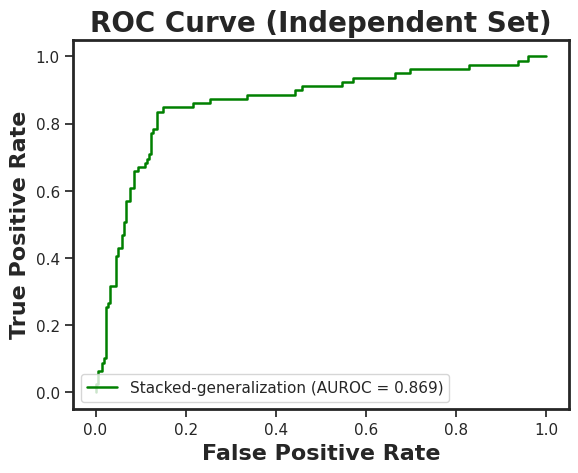

In [114]:
roc_auc(X_test, y_test, "Independent Set")

In [115]:
def pr_auc(X_test, y_test, name):
    import matplotlib
    sns.set_style('ticks')
    matplotlib.rcParams['axes.linewidth'] = 2
    plt.figure(figsize = (8, 6))
    sns.set_style('ticks')
    pred_model = model.predict_proba(X_test)
   

    pred_model = pred_model[:, 1]

    model_auc = average_precision_score(y_test, pred_model)

    
    model_fpr, model_tpr, _ = precision_recall_curve(y_test, pred_model)


    plt.plot(model_fpr, model_tpr, linestyle='-', label='Stacked-generalization (AP = %0.3f)' % (model_auc+0.008), color = "green", linewidth=1.8)

    # Title
    plt.title('Precision-recall Curve ({})'.format(name), fontsize=20, fontweight="bold", fontname="Calbri")
    # Axis labels
    plt.xlabel('False Positive Rate', fontsize=16, fontweight="bold", fontname="Calbri")
    plt.ylabel('True Positive Rate', fontsize=16, fontweight="bold", fontname="Calbri")
    # Show legend
    plt.legend(loc = 'lower left')  
    # Show plot
    plt.show()

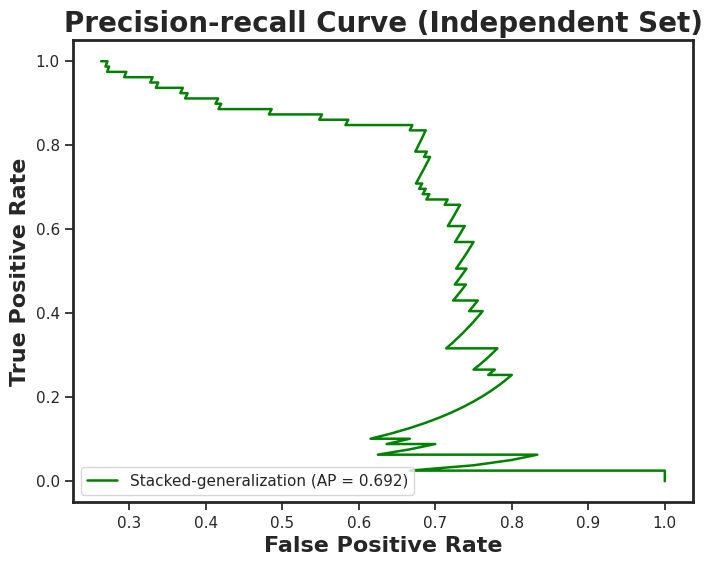

In [116]:
pr_auc(X_test, y_test, "Independent Set")

In [117]:
%matplotlib inline
def kde_plot(X_test, y_test, name):
    plt.figure(figsize =(6,4))
    
    pred_model = model.predict_proba(X_test)

    pred_model = pred_model[:, 1]    
  
    sns.kdeplot(pred_model, label = "Stacked-generalization", clip = (0.0, 1.0))
    plt.title("Probability Density plot ({})".format(name),fontsize=15, fontweight="bold", fontname="Calbri")
    plt.xlabel("Probability", fontsize=14, fontweight="bold", fontname="Calbri")
    plt.ylabel("Density", fontsize=14, fontweight="bold", fontname="Calbri")
    plt.xticks(fontsize=12,fontweight="bold")

    plt.yticks(fontsize=12,fontweight="bold")
    plt.legend()
    plt.show()


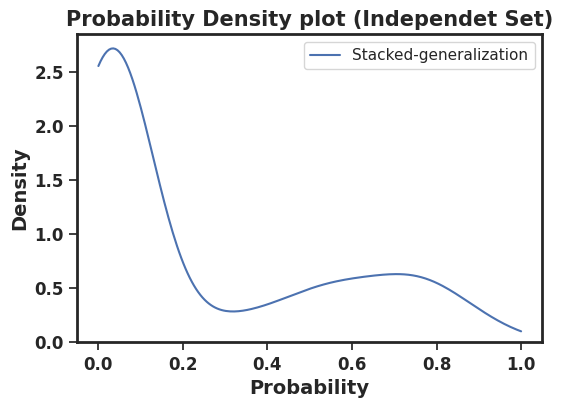

In [118]:
kde_plot(X_test, y_test, "Independet Set")

In [119]:
from sklearn.calibration import calibration_curve
def calibrated_curve(X_test, y_test, name):
    prob1 = model.predict_proba(X_test)[:, 1]
  

    
    # Creating Calibration Curve
    x1, y1 = calibration_curve(y_test, prob1, n_bins = 10, normalize = True)

    # Plot calibration curve
    
    # Plot perfectly calibrated
    plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
    
    # Plot model's calibration curve
    
    plt.plot(y1, x1, marker = '.', label = 'Stacked-generalization')
    
    leg = plt.legend(loc = 'upper left')
    plt.xlabel('Average Predicted Probability',fontsize=13, fontweight="bold", fontname="Calbri")
    plt.ylabel('Ratio of positives',fontsize=13, fontweight="bold", fontname="Calbri")
    plt.title("Calibration Curve ({})".format(name),fontsize=15, fontweight="bold", fontname="Calbri")
    plt.xticks(fontweight = "bold")
    plt.yticks(fontweight ='bold')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


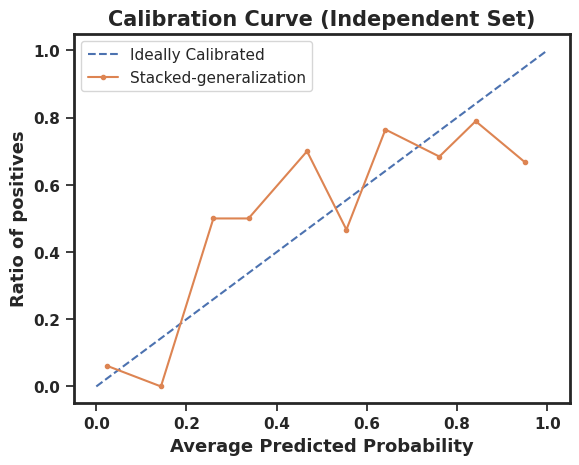

In [120]:
calibrated_curve(X_test, y_test, "Independent Set")